In [99]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs
from sklearn.metrics import log_loss

encoder = preprocessing.LabelEncoder()

In [100]:
data = pd.read_csv('data.csv')

In [101]:
data.head()

,id,location,country,gender,age,sym_on,hosp_vis,vis_wuhan,from_wuhan,death,recov,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6
0,1,"Shenzhen, Guangdong",China,male,66.0,1/3/2020,1/11/2020,1,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Shanghai,China,female,56.0,1/15/2020,1/15/2020,0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Zhejiang,China,male,46.0,1/4/2020,1/17/2020,0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Tianjin,China,female,60.0,NaN,NaN,1,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Tianjin,China,male,58.0,NaN,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
data = data.drop(['id','recov'],axis = 1)

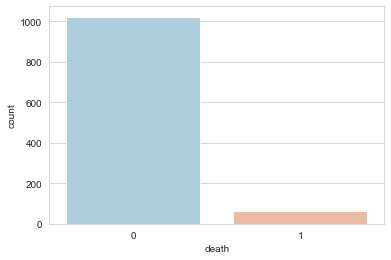

In [103]:
sns.set_style('whitegrid')
sns.countplot(x='death',data=data,palette='RdBu_r')

In [104]:
male = data.loc[data['gender'] == 'male'].count()[0]
female = data.loc[data['gender'] == 'female'].count()[0]
female

382

In [105]:
data = data.fillna(np.nan,axis=0)

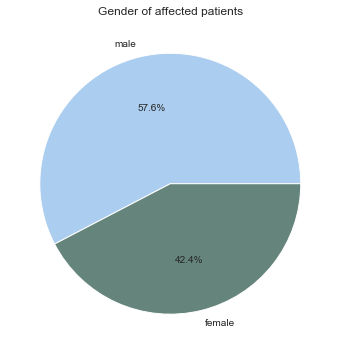

In [106]:
male = data.loc[data['gender'] == 'male'].count()[0]
female = data.loc[data['gender'] == 'female'].count()[0]


plt.figure(figsize=(10,6))

labels = ['male', 'female']
colors = ['#abcdef', '#65857c']

plt.pie([male, female], labels = labels, colors=colors, autopct='%1.1f%%')

plt.title('Gender of affected patients')

plt.show()

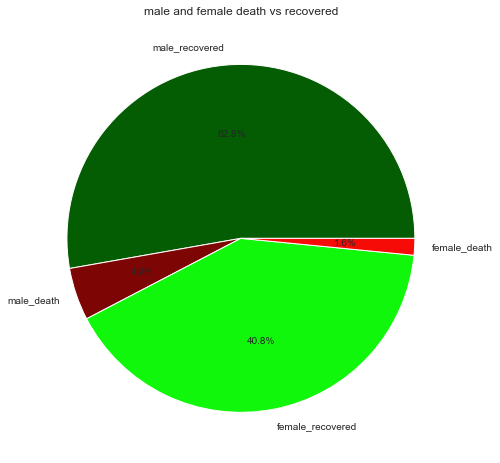

In [107]:
male_recovered = data.loc[(data['gender'] == 'male') & (data['death'] == 0)].count()[0]
male_death = data.loc[(data['gender'] == 'male') & (data['death'] == 1)].count()[0]

female_recovered = data.loc[(data['gender'] == 'female') & (data['death'] == 0)].count()[0]
female_death = data.loc[(data['gender'] == 'female') & (data['death'] == 1)].count()[0]

plt.figure(figsize=(12,8))

labels = ['male_recovered', 'male_death', 'female_recovered', 'female_death']
colors = ['#045c03', '#7d0604', '#10f70c', '#f70b07']

plt.pie([male_recovered, male_death, female_recovered, female_death], labels = labels, colors=colors, autopct='%1.1f%%')

plt.title('male and female death vs recovered')

plt.show()

In [108]:
data['death'].value_counts()

0    1022
1      63
Name: death, dtype: int64

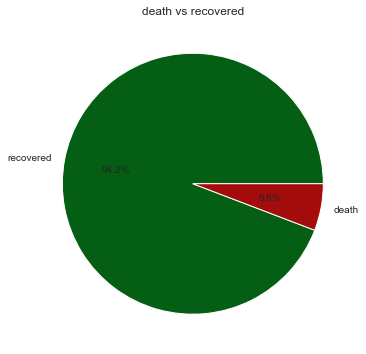

In [109]:
recovered = data.loc[data['death'] == 0].count()[0]
death = data.loc[data['death'] == 1].count()[0]


plt.figure(figsize=(10,6))

labels = ['recovered', 'death']
colors = ['#045e13', '#a30c0a']

plt.pie([recovered, death], labels = labels, colors=colors, autopct='%1.1f%%')

plt.title('death vs recovered')

plt.show()

In [110]:
data['age'].max()

96.0

In [111]:
zero_to_ten = data.loc[(data['age'] <= 10),  'age']
ten_to_twenty = data.loc[(data['age']> 10 ) & (data['age'] <=20)]
twenty_to_thirty = data.loc[(data['age']> 20 ) & (data['age'] <=30)]
thirty_to_forty = data.loc[(data['age']> 30 ) & (data['age'] <=40)]
forty_to_fifty = data.loc[(data['age']> 40 ) & (data['age'] <=50)]
fifty_to_sixty = data.loc[(data['age']> 50 ) & (data['age'] <=60)]
sixty_to_seventy = data.loc[(data['age']> 60 ) & (data['age'] <=70)]
seventy_to_eighty = data.loc[(data['age']> 70 ) & (data['age'] <= 80)]
eighty_to_ninty = data.loc[(data['age']> 80 ) & (data['age'] <=90)]
ninty_to_hundread = data.loc[(data['age']> 90 ) & (data['age'] <=100)]

sixty_to_seventy.count()[0]

134

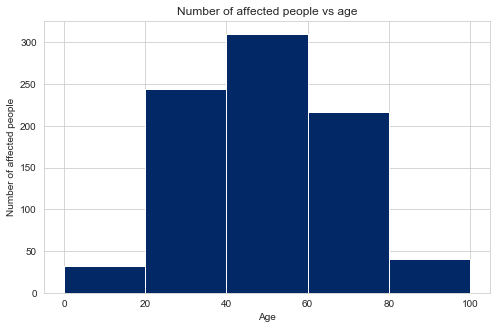

In [112]:
bins = [0,20,40,60,80,100]

plt.figure(figsize=(8,5))

plt.hist(data.age, bins=bins, color='#022866')

plt.xticks(bins)

plt.ylabel('Number of affected people')
plt.xlabel('Age') 
plt.title('Number of affected people vs age')

# plt.savefig('histogram.png', dpi=300)

plt.show()

In [113]:
zero_to_tewenty = data.loc[(data['age'] <= 20) & (data['death'] == 1)].count()[0]
twenty_to_forty = data.loc[(data['age']> 20 ) & (data['age'] <=40) & (data['death'] == 1)].count()[0]
forty_to_sixty = data.loc[(data['age']> 40 ) & (data['age'] <=60) & (data['death'] == 1)].count()[0]
sixty_to_eighty = data.loc[(data['age']> 60 ) & (data['age'] <=80) & (data['death'] == 1)].count()[0]
eighty_to_hundread = data.loc[(data['age']> 80 ) & (data['age'] <=100) & (data['death'] == 1)].count()[0]

sixty_to_seventy

,location,country,gender,age,sym_on,hosp_vis,vis_wuhan,from_wuhan,death,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6
0,"Shenzhen, Guangdong",China,male,66.0,1/3/2020,1/11/2020,1,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
20,Fujian,China,male,70.0,NaN,NaN,1,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
27,Guangxi,China,female,66.0,1/17/2020,1/17/2020,0,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN
32,Henan,China,male,68.0,NaN,NaN,0,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN
40,Heilongjiang,China,male,69.0,NaN,NaN,1,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,Hong Kong,Hong Kong,female,70.0,2/13/2020,2/13/2020,0,0.0,0,cough with sputum,NaN,NaN,NaN,NaN,NaN
998,Tenerife,Spain,male,69.0,NaN,NaN,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1007,Andalusia,Spain,male,62.0,NaN,NaN,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1028,Madrid,Spain,NaN,66.0,NaN,NaN,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN


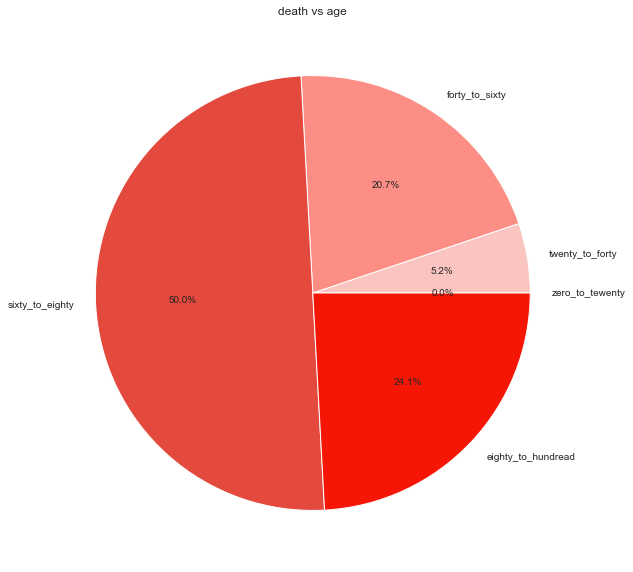

In [114]:
plt.figure(figsize=(15,10))

labels = ['zero_to_tewenty', 'twenty_to_forty','forty_to_sixty','sixty_to_eighty','eighty_to_hundread']
colors = ['#f7e7e6', '#fac4c0','#fc8e86','#e3493d','#f51605']

plt.pie([zero_to_tewenty, twenty_to_forty,forty_to_sixty,sixty_to_eighty,eighty_to_hundread], labels = labels, colors=colors, autopct='%1.1f%%')

plt.title('death vs age')

plt.show()

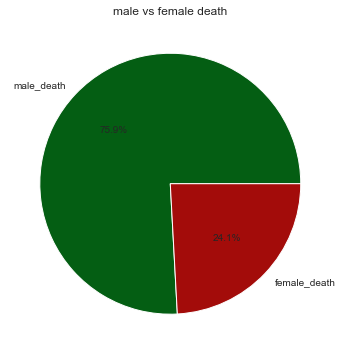

In [115]:
male_death = data.loc[(data['gender'] == 'male') & (data['death'] == 1)].count()[0]
female_death = data.loc[(data['gender'] == 'female') & (data['death'] == 1)].count()[0]

plt.figure(figsize=(10,6))

labels = ['male_death', 'female_death']
colors = ['#045e13', '#a30c0a']

plt.pie([male_death, female_death], labels = labels, colors=colors, autopct='%1.1f%%')

plt.title('male vs female death')

plt.show()

In [116]:
male_mortality_rate = (male_death/male)*100
male_mortality_rate


8.461538461538462

In [117]:
female_mortality_rate = (female_death/female)*100
female_mortality_rate

3.664921465968586

Text(0.5, 1.0, 'Male vs Female mortality rate')

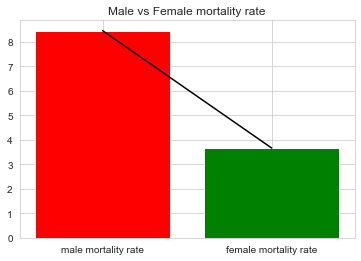

In [118]:
plt.bar(['male mortality rate','female mortality rate'],[male_mortality_rate,female_mortality_rate],color=['red','green'])
plt.plot([male_mortality_rate,female_mortality_rate],color='black')
plt.title('Male vs Female mortality rate')

In [119]:
data['location'] = encoder.fit_transform(data['location'].astype(str))
data['country'] = encoder.fit_transform(data['country'].astype(str))
data['gender'] = encoder.fit_transform(data['gender'].astype(str))
data = data.fillna(np.nan,axis=0)

In [120]:
data.head()

,location,country,gender,age,sym_on,hosp_vis,vis_wuhan,from_wuhan,death,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6
0,116,8,1,66.0,1/3/2020,1/11/2020,1,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,113,8,0,56.0,1/15/2020,1/15/2020,0,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,154,8,1,46.0,1/4/2020,1/17/2020,0,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,129,8,0,60.0,NaN,NaN,1,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,129,8,1,58.0,NaN,NaN,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
data[['symptom1']] = encoder.fit_transform(data['symptom1'].astype(str))
data[['symptom2']] = encoder.fit_transform(data['symptom2'].astype(str))
data[['symptom3']] = encoder.fit_transform(data['symptom3'].astype(str))
data[['symptom4']] = encoder.fit_transform(data['symptom4'].astype(str))
data[['symptom5']] = encoder.fit_transform(data['symptom5'].astype(str))
data[['symptom6']] = encoder.fit_transform(data['symptom6'].astype(str))

In [122]:
data.head()

,location,country,gender,age,sym_on,hosp_vis,vis_wuhan,from_wuhan,death,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6
0,116,8,1,66.0,1/3/2020,1/11/2020,1,0.0,0,17,31,23,12,3,1
1,113,8,0,56.0,1/15/2020,1/15/2020,0,1.0,0,17,31,23,12,3,1
2,154,8,1,46.0,1/4/2020,1/17/2020,0,1.0,0,17,31,23,12,3,1
3,129,8,0,60.0,NaN,NaN,1,0.0,0,17,31,23,12,3,1
4,129,8,1,58.0,NaN,NaN,0,0.0,0,17,31,23,12,3,1


In [123]:
data['sym_on'] = pd.to_datetime(data['sym_on'])
data['hosp_vis'] = pd.to_datetime(data['hosp_vis'])
data['sym_on']= data['sym_on'].map(dt.datetime.toordinal)
data['hosp_vis']= data['hosp_vis'].map(dt.datetime.toordinal)
data['diff_sym_hos']= data['hosp_vis'] - data['sym_on']

In [124]:
data = data.drop(['sym_on','hosp_vis'],axis=1)

In [125]:
data.head()

,location,country,gender,age,vis_wuhan,from_wuhan,death,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos
0,116,8,1,66.0,1,0.0,0,17,31,23,12,3,1,8
1,113,8,0,56.0,0,1.0,0,17,31,23,12,3,1,0
2,154,8,1,46.0,0,1.0,0,17,31,23,12,3,1,13
3,129,8,0,60.0,1,0.0,0,17,31,23,12,3,1,0
4,129,8,1,58.0,0,0.0,0,17,31,23,12,3,1,0


In [126]:
data.dtypes

location          int32
country           int32
gender            int32
age             float64
vis_wuhan         int64
from_wuhan      float64
death             int64
symptom1          int32
symptom2          int32
symptom3          int32
symptom4          int32
symptom5          int32
symptom6          int32
diff_sym_hos      int64
dtype: object

In [127]:
import matplotlib.pyplot as plt
def counter2(colname1,colname2):
  colname1 = pd.Series(colname1)
  colname2 = pd.Series(colname2)
  count1 = 0
  for i in range(min([colname1.size,colname2.size])):
    if(colname1[i]==1 and colname2[i]==1):
      count1 = count1+1
  return count1

def counter1(colname):
  colname1 = pd.Series(colname)
  count = 0
  for i in range(colname1.size):
    if(colname1[i]==1):
      count = count+1
  return count

In [128]:
fwuh = counter1(data['from_wuhan'])
vwuh = counter1(data['vis_wuhan'])

In [129]:
print(counter1(data['death']))
print(counter2(data['from_wuhan'],data['death']))
print(counter2(data['vis_wuhan'],data['death']))

63
34
1


In [130]:
data['age'] = data['age'].fillna((data['age'].mean()))
data['from_wuhan'] = data['from_wuhan'].fillna((data['from_wuhan'].mode()[0]))

In [131]:
data.isnull().any()

location        False
country         False
gender          False
age             False
vis_wuhan       False
from_wuhan      False
death           False
symptom1        False
symptom2        False
symptom3        False
symptom4        False
symptom5        False
symptom6        False
diff_sym_hos    False
dtype: bool

In [132]:
data.describe()

,location,country,gender,age,vis_wuhan,from_wuhan,death,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos
count,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.00000,1085.000000,1085.000000
mean,89.594470,19.162212,0.816590,49.483689,0.176959,0.143779,0.058065,14.871889,28.233180,22.235945,11.872811,2.99447,0.999078,1.142857
std,43.065765,9.177094,0.698246,16.089079,0.381810,0.351027,0.233973,4.466480,7.228991,3.241452,1.057589,0.11351,0.030359,2.491842
min,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-5.000000
25%,48.000000,12.000000,0.000000,39.000000,0.000000,0.000000,0.000000,17.000000,31.000000,23.000000,12.000000,3.00000,1.000000,0.000000
50%,107.000000,19.000000,1.000000,49.483689,0.000000,0.000000,0.000000,17.000000,31.000000,23.000000,12.000000,3.00000,1.000000,0.000000
75%,123.000000,27.000000,1.000000,58.000000,0.000000,0.000000,0.000000,17.000000,31.000000,23.000000,12.000000,3.00000,1.000000,1.000000
max,155.000000,37.000000,2.000000,96.000000,1.000000,1.000000,1.000000,27.000000,31.000000,23.000000,12.000000,3.00000,1.000000,15.000000


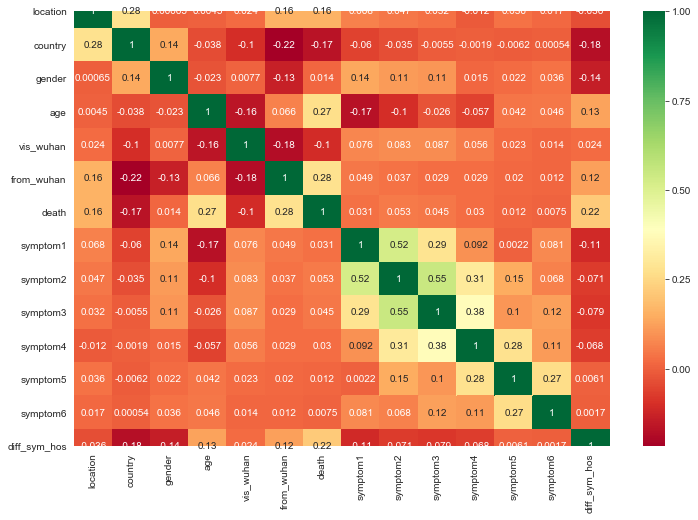

In [133]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,8))
g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [134]:
data.corr()

,location,country,gender,age,vis_wuhan,from_wuhan,death,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos
location,1.000000,0.281899,0.000653,0.004520,0.024117,0.161607,0.160176,0.067779,0.047345,0.031851,-0.011929,0.035774,0.016648,-0.035694
country,0.281899,1.000000,0.140118,-0.038126,-0.102454,-0.216868,-0.165504,-0.059876,-0.035251,-0.005474,-0.001864,-0.006223,0.000537,-0.177384
gender,0.000653,0.140118,1.000000,-0.022635,0.007664,-0.133192,0.014426,0.137400,0.113751,0.106362,0.014603,0.022109,0.035537,-0.138156
age,0.004520,-0.038126,-0.022635,1.000000,-0.164450,0.065742,0.271514,-0.169802,-0.101210,-0.025720,-0.057265,0.041877,0.046241,0.127932
vis_wuhan,0.024117,-0.102454,0.007664,-0.164450,1.000000,-0.183128,-0.104798,0.076056,0.082966,0.086986,0.055790,0.022600,0.014083,0.023825
from_wuhan,0.161607,-0.216868,-0.133192,0.065742,-0.183128,1.000000,0.280152,0.048828,0.036581,0.028533,0.029425,0.019973,0.012446,0.123093
death,0.160176,-0.165504,0.014426,0.271514,-0.104798,0.280152,1.000000,0.030959,0.053074,0.045170,0.029873,0.012101,0.007541,0.219937
symptom1,0.067779,-0.059876,0.137400,-0.169802,0.076056,0.048828,0.030959,1.000000,0.520321,0.285064,0.092241,0.002241,0.080768,-0.109008
symptom2,0.047345,-0.035251,0.113751,-0.101210,0.082966,0.036581,0.053074,0.520321,1.000000,0.549681,0.307110,0.148848,0.068236,-0.071295
symptom3,0.031851,-0.005474,0.106362,-0.025720,0.086986,0.028533,0.045170,0.285064,0.549681,1.000000,0.378506,0.103839,0.124080,-0.079214


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001772873B588>,
      dtype=object)

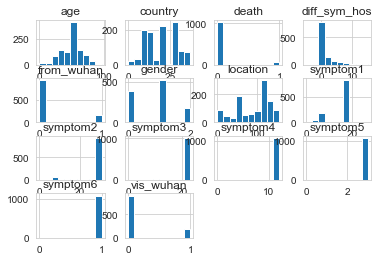

In [135]:
data.hist()

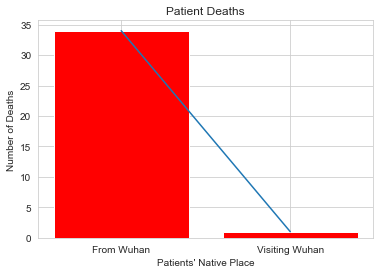

In [136]:
import matplotlib.pyplot as plt

plt.bar(['From Wuhan','Visiting Wuhan'],[counter2(data['death'],data['from_wuhan']),counter2(data['death'],data['vis_wuhan'])],color='red')
plt.title('Patient Deaths')
plt.xlabel('Patients\' Native Place')
plt.ylabel('Number of Deaths')
plt.plot([counter2(data['death'],data['from_wuhan']),counter2(data['death'],data['vis_wuhan'])])
plt.show()

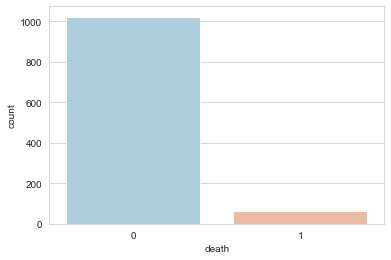

In [137]:
sns.set_style('whitegrid')
sns.countplot(x='death',data=data,palette='RdBu_r')

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 14 columns):
location        1085 non-null int32
country         1085 non-null int32
gender          1085 non-null int32
age             1085 non-null float64
vis_wuhan       1085 non-null int64
from_wuhan      1085 non-null float64
death           1085 non-null int64
symptom1        1085 non-null int32
symptom2        1085 non-null int32
symptom3        1085 non-null int32
symptom4        1085 non-null int32
symptom5        1085 non-null int32
symptom6        1085 non-null int32
diff_sym_hos    1085 non-null int64
dtypes: float64(2), int32(9), int64(3)
memory usage: 80.7 KB


In [139]:
data.shape

(1085, 14)

In [140]:
def bar_chart(feature):
    survived = data[data['death']==0][feature].value_counts()
    dead = data[data['death']==1][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','dead']
    df.plot(kind='bar', stacked=True, figsize=(20,10))

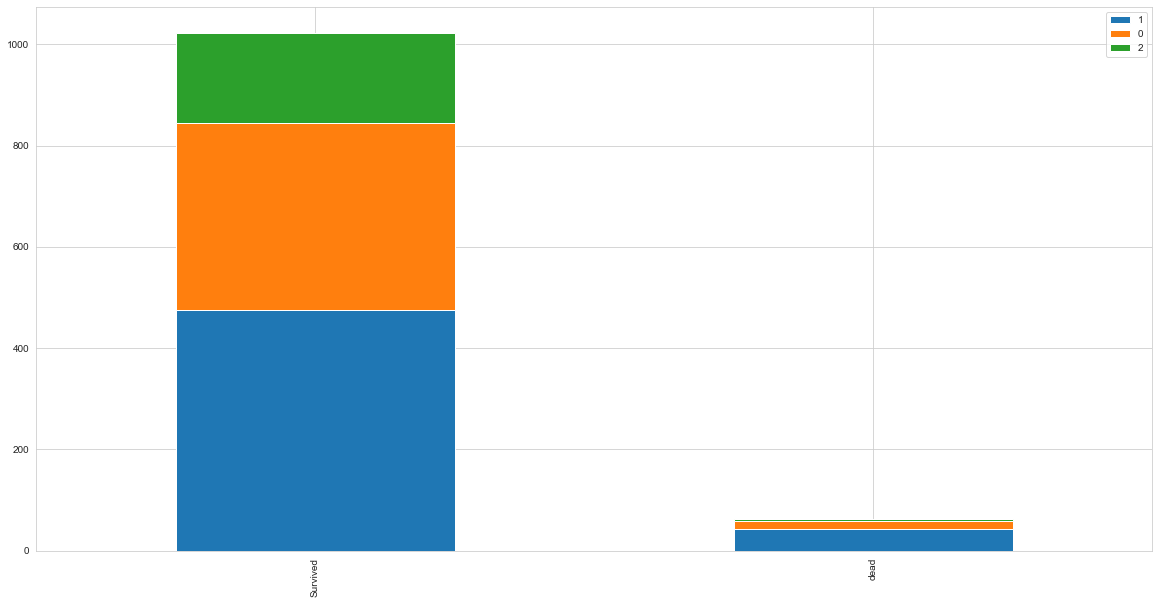

In [141]:
bar_chart('gender')

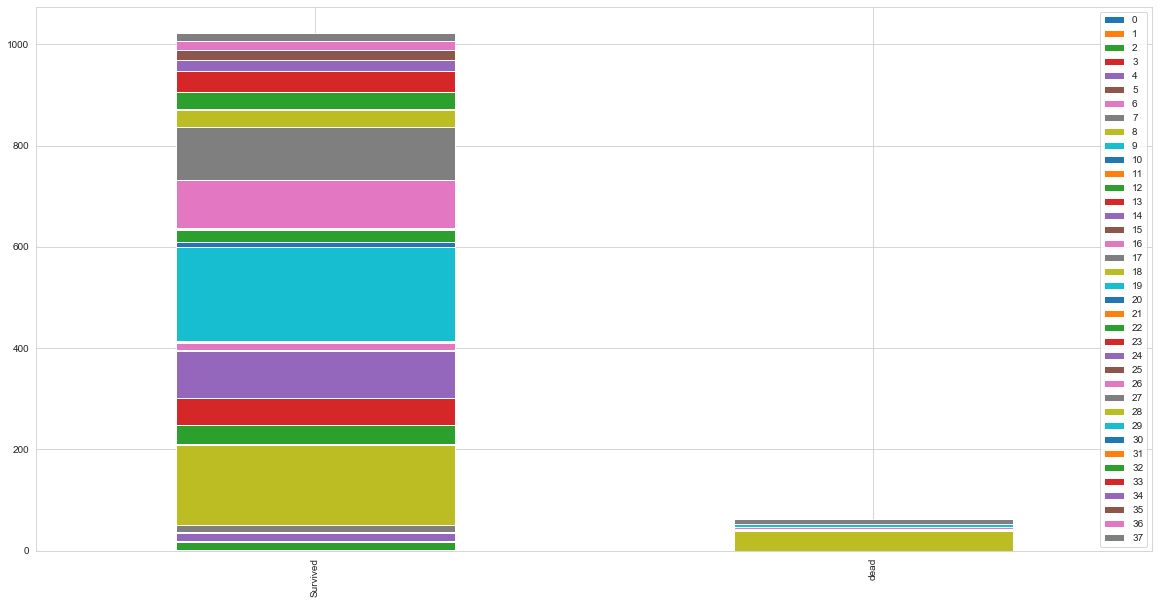

In [142]:
bar_chart('country')

In [143]:
print(data.isna().sum())

location        0
country         0
gender          0
age             0
vis_wuhan       0
from_wuhan      0
death           0
symptom1        0
symptom2        0
symptom3        0
symptom4        0
symptom5        0
symptom6        0
diff_sym_hos    0
dtype: int64


In [144]:
data = pd.read_excel('train1.xlsx')

In [145]:
data = data.drop(['id'],axis = 1)

In [146]:
data.head()

,location,country,gender,age,sym_on,hosp_vis,vis_wuhan,from_wuhan,death,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6
0,"Wuhan, Hubei",China,male,61.0,2019-12-20,2019-12-27,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN
1,"Wuhan, Hubei",China,male,69.0,2019-12-30,2020-01-03,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,"Wuhan, Hubei",China,male,89.0,NaT,NaT,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN
3,"Wuhan, Hubei",China,male,89.0,2020-01-13,2020-01-13,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN
4,"Wuhan, Hubei",China,male,66.0,2020-01-10,2020-01-16,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
data['location'] = encoder.fit_transform(data['location'].astype(str))
data['country'] = encoder.fit_transform(data['country'].astype(str))
data['gender'] = encoder.fit_transform(data['gender'].astype(str))
data = data.fillna(np.nan,axis=0)

In [148]:
data[['symptom1']] = encoder.fit_transform(data['symptom1'].astype(str))
data[['symptom2']] = encoder.fit_transform(data['symptom2'].astype(str))
data[['symptom3']] = encoder.fit_transform(data['symptom3'].astype(str))
data[['symptom4']] = encoder.fit_transform(data['symptom4'].astype(str))
data[['symptom5']] = encoder.fit_transform(data['symptom5'].astype(str))
data[['symptom6']] = encoder.fit_transform(data['symptom6'].astype(str))

In [149]:
data['sym_on'] = pd.to_datetime(data['sym_on'])
data['hosp_vis'] = pd.to_datetime(data['hosp_vis'])
data['sym_on']= data['sym_on'].map(dt.datetime.toordinal)
data['hosp_vis']= data['hosp_vis'].map(dt.datetime.toordinal)
data['diff_sym_hos']= data['hosp_vis'] - data['sym_on']

In [150]:
data = data.drop(['sym_on','hosp_vis'],axis=1)

In [151]:
data['age'] = data['age'].fillna((data['age'].mean()))
data['from_wuhan'] = data['from_wuhan'].fillna((data['from_wuhan'].mode()[0]))

In [152]:
data.head()

,location,country,gender,age,vis_wuhan,from_wuhan,death,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos
0,58,6,1,61.0,0,1,1,9,10,12,2,0,0,7
1,58,6,1,69.0,0,1,1,9,10,12,2,0,0,4
2,58,6,1,89.0,0,1,1,9,10,12,2,0,0,0
3,58,6,1,89.0,0,1,1,9,10,12,2,0,0,0
4,58,6,1,66.0,0,1,1,9,10,12,2,0,0,6


In [153]:
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs
from sklearn.metrics import balanced_accuracy_score as bas
from sklearn.metrics import confusion_matrix as cm

In [154]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)



In [155]:
X = data[['location','country','gender','age','vis_wuhan','from_wuhan','symptom1','symptom2','symptom3','symptom4','symptom5','symptom6','diff_sym_hos']]
Y = data['death']

In [156]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state=20)
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [157]:
X_test

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos
225,42,6,0,9.000000,0,1,9,10,12,2,0,0,0
133,46,17,0,54.000000,0,0,9,10,12,2,0,0,3
211,11,8,2,48.519792,0,0,9,10,12,2,0,0,0
58,7,12,1,65.000000,0,0,4,4,12,2,0,0,3
259,40,12,1,45.000000,0,0,4,5,5,0,0,0,5
260,13,12,1,65.000000,0,0,5,9,12,2,0,0,4
150,47,18,0,52.000000,0,0,6,10,12,2,0,0,0
89,46,17,1,56.000000,0,1,9,10,12,2,0,0,1
234,59,6,1,49.000000,0,0,9,10,12,2,0,0,0
185,32,2,1,43.000000,1,0,9,10,12,2,0,0,0


In [158]:
pred = rf.predict(X_test)
recall = rs(Y_test,pred)
precision = ps(Y_test,pred)
f1 = fs(Y_test,pred)
accuracy = rf.score(X_test,Y_test)

In [159]:
print(' Evaluation metrics for test dataset ')
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',accuracy)

 Evaluation metrics for test dataset 
Recall Score:  0.3076923076923077
Precision Score:  1.0
F1 Score:  0.47058823529411764
Accuracy:  0.8392857142857143


Text(0.5, 1.0, 'Evaluation Metrics for random forest')

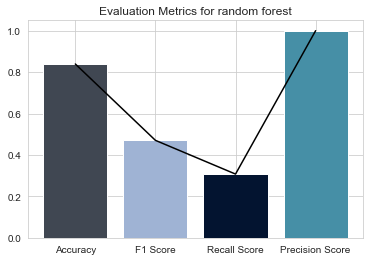

In [160]:
import matplotlib.pyplot as plt

plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[accuracy,f1,recall,precision],color=['#404752','#9fb3d4','#031430','#468fa6'])
plt.plot([accuracy,f1,recall,precision],color='black')
plt.title('Evaluation Metrics for random forest')

In [161]:
from sklearn.tree import DecisionTreeClassifier as dtc
classifier = dtc()

In [162]:
X = data[['location','country','gender','age','vis_wuhan','from_wuhan','symptom1','symptom2','symptom3','symptom4','symptom5','symptom6','diff_sym_hos']]
Y = data['death']

In [163]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)
classifier.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [164]:
pred = classifier.predict(X_test)
recall_dtc = rs(Y_test,pred)
precision_dtc = ps(Y_test,pred)
f1_dtc = fs(Y_test,pred)
ma_dtc = classifier.score(X_test,Y_test)

In [165]:
print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall_dtc)
print('Precision Score: ',precision_dtc)
print('F1 Score: ',f1_dtc)
print('Accuracy: ',ma_dtc)


*** Evaluation metrics for test dataset ***

Recall Score:  0.6153846153846154
Precision Score:  0.6666666666666666
F1 Score:  0.64
Accuracy:  0.8392857142857143


In [166]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,pred)

array([[39,  4],
       [ 5,  8]], dtype=int64)

Text(0.5, 1.0, 'Evaluation Metrics for decision tree')

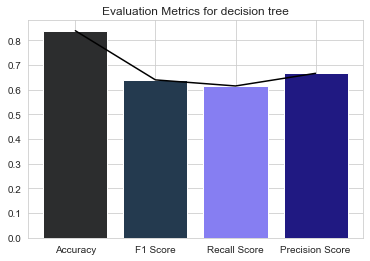

In [167]:
import matplotlib.pyplot as plt

plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma_dtc,f1_dtc,recall_dtc,precision_dtc],color=['#2c2d2e','#243a4f','#867ef2','#201982'])
plt.plot([ma_dtc,f1_dtc,recall_dtc,precision_dtc],color='black')
plt.title('Evaluation Metrics for decision tree')

In [168]:
from sklearn import svm
svm = svm.SVC()

In [169]:
X = data[['location','country','gender','age','vis_wuhan','from_wuhan','symptom1','symptom2','symptom3','symptom4','symptom5','symptom6','diff_sym_hos']]
Y = data['death']

In [170]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=30)
svm.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [171]:
pred = svm.predict(X_test)

recall_svm = rs(Y_test,pred)
precision_svm = ps(Y_test,pred)
f1_svm = fs(Y_test,pred)
ma_svm = svm.score(X_test,Y_test)

In [172]:
print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall_svm)
print('Precision Score: ',precision_svm)
print('F1 Score: ',f1_svm)
print('Accuracy: ',ma_svm)

*** Evaluation metrics for test dataset ***

Recall Score:  0.5
Precision Score:  0.8571428571428571
F1 Score:  0.631578947368421
Accuracy:  0.875


Text(0.5, 1.0, 'Evaluation Metrics for support vector machine')

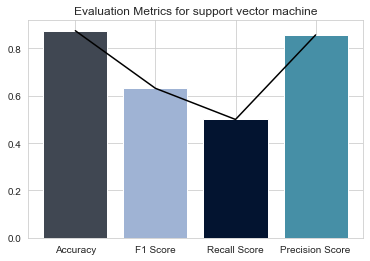

In [173]:
import matplotlib.pyplot as plt

plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma_svm,f1_svm,recall_svm,precision_svm],color=['#404752','#9fb3d4','#031430','#468fa6'])
plt.plot([ma_svm,f1_svm,recall_svm,precision_svm],color='black')
plt.title('Evaluation Metrics for support vector machine')

In [174]:
from sklearn.linear_model import LogisticRegression as lr

classifier = lr()

In [175]:
X = data[['location','country','gender','age','vis_wuhan','from_wuhan','symptom1','symptom2','symptom3','symptom4','symptom5','symptom6','diff_sym_hos']]
Y = data['death']

In [176]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=5)
classifier.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [177]:
pred = classifier.predict(X_test)

recall_lr = rs(Y_test,pred)
precision_lr = ps(Y_test,pred)
f1_lr = fs(Y_test,pred)
ma_lr = classifier.score(X_test,Y_test)

In [178]:
print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall_lr)
print('Precision Score: ',precision_lr)
print('F1 Score: ',f1_lr)
print('Accuracy: ',ma_lr)


*** Evaluation metrics for test dataset ***

Recall Score:  0.5
Precision Score:  0.7142857142857143
F1 Score:  0.588235294117647
Accuracy:  0.875


Text(0.5, 1.0, 'Evaluation Metrics for logistic regression')

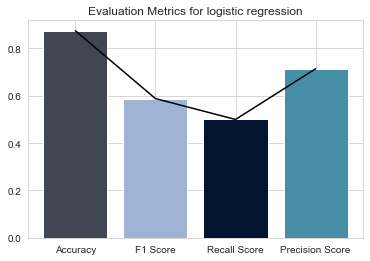

In [179]:
import matplotlib.pyplot as plt

plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma_lr,f1_lr,recall_lr,precision_lr],color=['#404752','#9fb3d4','#031430','#468fa6'])
plt.plot([ma_lr,f1_lr,recall_lr,precision_lr],color='black')
plt.title('Evaluation Metrics for logistic regression')

In [180]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

In [181]:
X = data[['location','country','gender','age','vis_wuhan','from_wuhan','symptom1','symptom2','symptom3','symptom4','symptom5','symptom6','diff_sym_hos']]
Y = data['death']

In [182]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1,random_state=10)
classifier.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [183]:
pred = classifier.predict(X_test)

recall_gnb = rs(Y_test,pred)
precision_gnb = ps(Y_test,pred)
f1_gnb = fs(Y_test,pred)
ma_gnb = classifier.score(X_test,Y_test)

In [184]:
print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall_gnb)
print('Precision Score: ',precision_gnb)
print('F1 Score: ',f1_gnb)
print('Accuracy: ',ma_gnb)

*** Evaluation metrics for test dataset ***

Recall Score:  1.0
Precision Score:  0.3684210526315789
F1 Score:  0.5384615384615384
Accuracy:  0.5714285714285714


Text(0.5, 1.0, 'Evaluation Metrics for gaussian naive bayes')

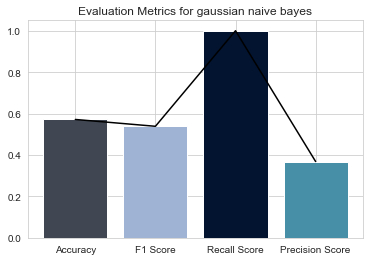

In [197]:
import matplotlib.pyplot as plt

plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma_gnb,f1_gnb,recall_gnb,precision_gnb],color=['#404752','#9fb3d4','#031430','#468fa6'])
plt.plot([ma_gnb,f1_gnb,recall_gnb,precision_gnb],color='black')
plt.title('Evaluation Metrics for gaussian naive bayes')

In [198]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=1,
                     weights='uniform')


In [199]:
X = data[['location','country','gender','age','vis_wuhan','from_wuhan','symptom1','symptom2','symptom3','symptom4','symptom5','symptom6','diff_sym_hos']]
Y = data['death']

In [200]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=50)
classifier.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=1,
                     weights='uniform')

In [201]:
pred = classifier.predict(X_test)

recall_knn = rs(Y_test,pred)
precision_knn = ps(Y_test,pred)
f1_knn = fs(Y_test,pred)
ma_knn = classifier.score(X_test,Y_test)

In [202]:
print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall_knn)
print('Precision Score: ',precision_knn)
print('F1 Score: ',f1_knn)
print('Accuracy: ',ma_knn)

*** Evaluation metrics for test dataset ***

Recall Score:  0.8125
Precision Score:  1.0
F1 Score:  0.896551724137931
Accuracy:  0.9464285714285714


In [203]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,pred)

array([[40,  0],
       [ 3, 13]], dtype=int64)

Text(0.5, 1.0, 'Evaluation Metrics for k nearest neighbors')

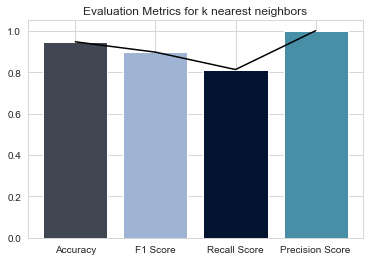

In [204]:
import matplotlib.pyplot as plt

plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma_knn,f1_knn,recall_knn,precision_knn],color=['#404752','#9fb3d4','#031430','#468fa6'])
plt.plot([ma_knn,f1_knn,recall_knn,precision_knn],color='black')
plt.title('Evaluation Metrics for k nearest neighbors')

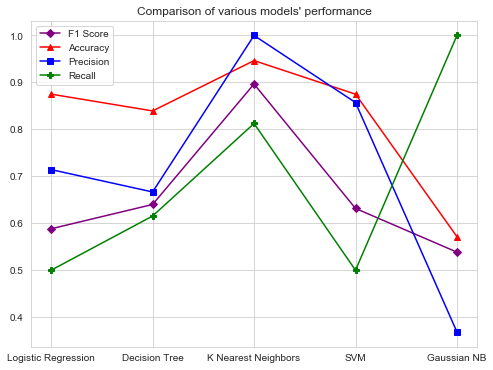

In [205]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
#plt.bar(['Logistic Regression','Decision Tree','SVM','Gaussian NB','knn'],[f1_lr,f1_dtc,f1_svm,f1_gnb,f1],color=['red','green','purple','orange','Blue'])
plt.plot(['Logistic Regression','Decision Tree','K Nearest Neighbors','SVM','Gaussian NB'],[f1_lr,f1_dtc,f1_knn,f1_svm,f1_gnb],color='purple',marker='D')
plt.plot(['Logistic Regression','Decision Tree','K Nearest Neighbors','SVM','Gaussian NB'],[ma_lr,ma_dtc,ma_knn,ma_svm,ma_gnb],color='red',marker='^')
plt.plot(['Logistic Regression','Decision Tree','K Nearest Neighbors','SVM','Gaussian NB'],[precision_lr,precision_dtc,precision_knn,precision_svm,precision_gnb],color='blue',marker='s')
plt.plot(['Logistic Regression','Decision Tree','K Nearest Neighbors','SVM','Gaussian NB'],[recall_lr,recall_dtc,recall_knn,recall_svm,recall_gnb],color='green',marker='P')
plt.legend(('F1 Score','Accuracy','Precision','Recall'))
plt.title('Comparison of various models\' performance')

plt.show(fig)

In [206]:
X1 = data[['location','country','gender','age','vis_wuhan','from_wuhan','symptom1','symptom2','symptom3','symptom4','symptom5','symptom6','diff_sym_hos']]
Y1 = data['death']
classifier1 = KNeighborsClassifier()

n_neighbors = [1,2,3,5,7,9,11,13,15]
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = [10,20,30,40,50]
p = [1,2]

params_grid = {'n_neighbors':n_neighbors,'weights':weights,'algorithm':algorithm,'leaf_size':leaf_size, 'p':p}

gridder = GridSearchCV(estimator=classifier1,param_grid=params_grid,n_jobs=-1,cv=5,verbose=5 )
gridder.fit(X1,np.array(Y1).reshape(Y1.shape[0],1))

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1262 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:  1.4min finished
C:\Python\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Python\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [1, 2, 3, 5, 7, 9, 11, 13, 15],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [207]:
print(gridder.best_estimator_)

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=1,
                     weights='uniform')


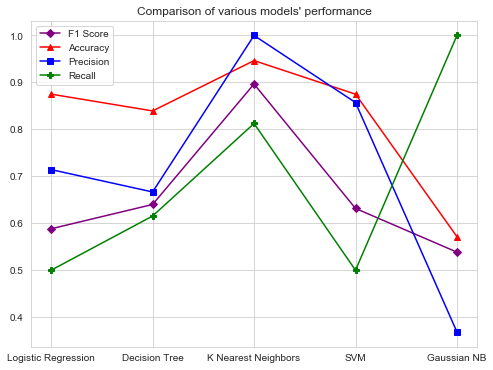

In [208]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
#plt.bar(['Logistic Regression','Decision Tree','SVM','Gaussian NB','knn'],[f1_lr,f1_dtc,f1_svm,f1_gnb,f1],color=['red','green','purple','orange','Blue'])
plt.plot(['Logistic Regression','Decision Tree','K Nearest Neighbors','SVM','Gaussian NB'],[f1_lr,f1_dtc,f1_knn,f1_svm,f1_gnb],color='purple',marker='D')
plt.plot(['Logistic Regression','Decision Tree','K Nearest Neighbors','SVM','Gaussian NB'],[ma_lr,ma_dtc,ma_knn,ma_svm,ma_gnb],color='red',marker='^')
plt.plot(['Logistic Regression','Decision Tree','K Nearest Neighbors','SVM','Gaussian NB'],[precision_lr,precision_dtc,precision_knn,precision_svm,precision_gnb],color='blue',marker='s')
plt.plot(['Logistic Regression','Decision Tree','K Nearest Neighbors','SVM','Gaussian NB'],[recall_lr,recall_dtc,recall_knn,recall_svm,recall_gnb],color='green',marker='P')
plt.legend(('F1 Score','Accuracy','Precision','Recall'))
plt.title('Comparison of various models\' performance')

plt.show(fig)